In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

#Load the datasets
Temp = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='cp1252')
GDP =  pd.read_csv('/Users/katarzyna/Desktop/Bootcamp/jdszr10-TheChaosMakers/projek_2_python/gdp_1960_2020.csv')

In [3]:
#Data Cleaning
Temp.columns = Temp.columns.str.replace('Y', '') 
Temp.drop(columns=['Area Code', 'Months Code', 'Element Code'], inplace=True) 
Temp.drop(Temp.loc[Temp['Element'] == 'Standard Deviation'].index, inplace=True) 
Temp_clean = Temp.loc[Temp['Months'] == 'Meteorological year'] 

GDP = GDP[['year', 'state', 'gdp']]
aggregated_gdp = GDP.groupby(['year', 'state']).sum().reset_index()
aggregated_gdp.rename(columns = {'state':'Region'}, inplace = True)
aggregated_gdp.rename(columns = {'year':'Year'}, inplace = True)
aggregated_gdp.replace(['America'], 'Americas', inplace = True)

In [4]:
#Selecting areas that interest me in current project and cleaning the df 

areas = [ 'Africa','Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union',
       'Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries', 'Annex I countries',
       'Non-Annex I countries', 'OECD']

main_areas = ['Africa','Americas', 'Asia', 'Europe']


Temp_A = Temp_clean[Temp_clean['Area'].isin(areas)]
Temp_MA = Temp_clean[Temp_clean['Area'].isin(main_areas)]

In [5]:
Podsumowanie = Temp_MA.describe()

In [6]:
srednia = Podsumowanie.loc['mean']

In [ ]:
Temp_MA.isna().sum() #Checking for missing data

In [ ]:
Temp_A.isna().sum() 

In [8]:
#Reshaping the data so it's easier for me to plot them
temp_melted = pd.melt(Temp_MA, id_vars=['Area', 'Months', 'Element', 'Unit'], var_name='Year', value_name='Temperature Change')

#More cleaning
temp_melted = temp_melted.drop(['Months', 'Element', 'Unit'], axis=1)
temp_melted = temp_melted.rename(columns={'Area': 'Region'})
temp_melted['Year'] = pd.to_numeric(temp_melted['Year'])


temp_melted

,Region,Year,Temperature Change
0,Africa,1961,-0.017
1,Americas,1961,0.052
2,Asia,1961,0.049
3,Europe,1961,0.874
4,Africa,1962,-0.040
...,...,...,...
231,Europe,2018,2.009
232,Africa,2019,1.415
233,Americas,2019,1.246
234,Asia,2019,1.369


In [9]:
o = temp_melted[temp_melted['Year'] >= 2000]

o

,Region,Year,Temperature Change
156,Africa,2000,0.496
157,Americas,2000,0.735
158,Asia,2000,0.680
159,Europe,2000,1.342
160,Africa,2001,0.677
...,...,...,...
231,Europe,2018,2.009
232,Africa,2019,1.415
233,Americas,2019,1.246
234,Asia,2019,1.369


In [21]:
mean_temp = temp_melted.groupby('Region').mean().reset_index()
mean_temp.drop(columns = ['Year'], inplace = True)
mean_temp

,Region,Temperature Change
0,Africa,0.491475
1,Americas,0.483119
2,Asia,0.473000
3,Europe,0.731712


In [22]:
mean_temp_o = o.groupby('Region').mean().reset_index()
mean_temp_o.drop(columns = ['Year'], inplace = True)
mean_temp_o

,Region,Temperature Change
0,Africa,1.01730
1,Americas,1.02035
2,Asia,1.06045
3,Europe,1.56985


# Jaki obszar miał najwyższą średnią zmianę temperatury?

Dla całego zbioru danych

<AxesSubplot:xlabel='Region', ylabel='Temperature Change'>

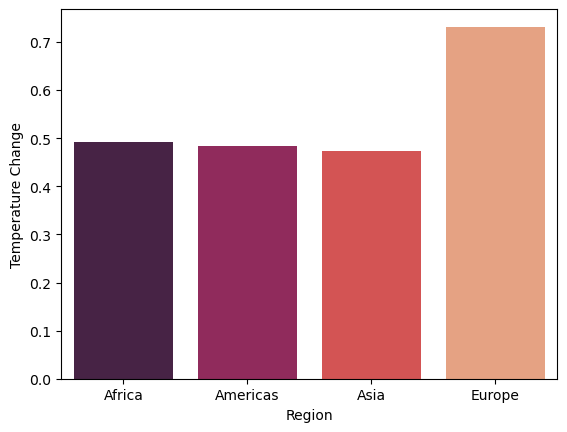

In [11]:
sns.barplot(x = 'Region', y = 'Temperature Change', data = mean_temp, palette = 'rocket')

Dla ostatnich 20 lat

<AxesSubplot:xlabel='Region', ylabel='Temperature Change'>

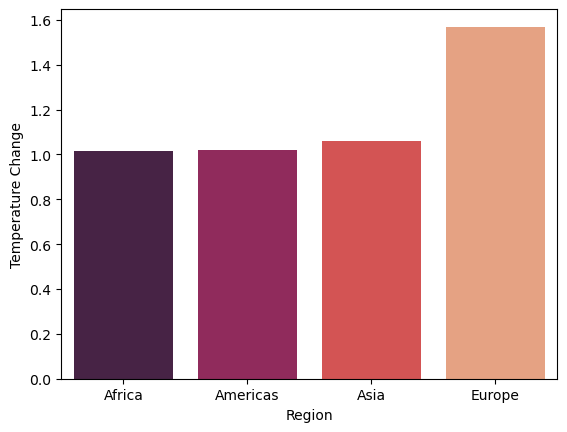

In [23]:
sns.barplot(x = 'Region', y = 'Temperature Change', data = mean_temp_o, palette = 'rocket')

# Jak wyglądała zmiana temperatur na przestrzeni lat?

<AxesSubplot:xlabel='Year', ylabel='Temperature Change'>

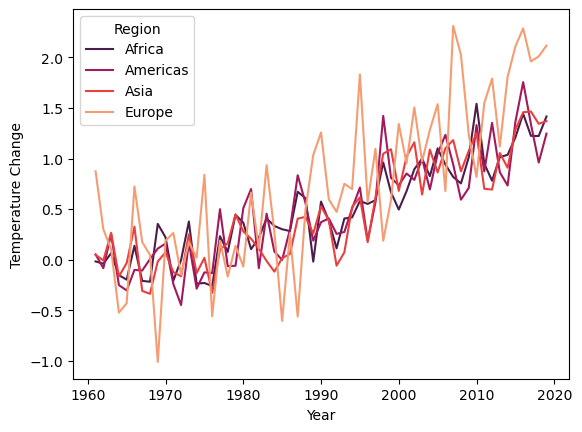

In [12]:
sns.lineplot(x='Year', y = 'Temperature Change', hue= 'Region', data = temp_melted, palette = 'rocket')

## Jak wyglądała zmiana temperatur na przestrzeni ostatnich 20 lat?

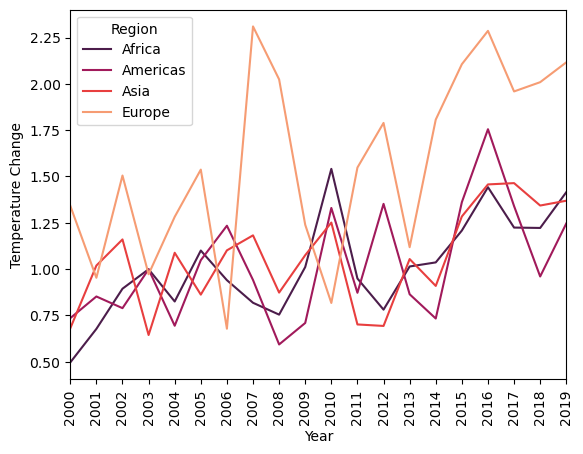

In [13]:
sns.lineplot(x='Year', y = 'Temperature Change', hue= 'Region', data = o, palette = 'rocket')

# Set x-axis tick labels to display integers only
plt.xticks([int(x) for x in plt.gca().get_xticks() if x >= 0], rotation=90)

# Create a list of all years in dataset
all_years = list(range(min(o['Year']), max(o['Year']) + 1))

# Set x-axis ticks and labels to display every year
plt.xticks(all_years, rotation=90)

# Set the x-axis limits to include the end point (year 2019)
plt.xlim(min(o['Year']), 2019)

# Show the plot
plt.show()

## Jak wyglądało GDP w analogicznych obszarach geograficznych?

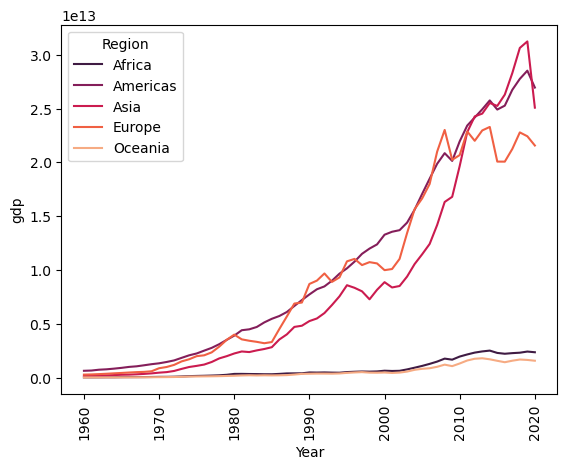

In [14]:
sns.lineplot(x='Year', y='gdp', hue='Region', data=aggregated_gdp, palette = 'rocket')
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Merge temp_melted and aggregated_gdp DataFrames on 'Region' and 'Years' columns
merged_df = pd.merge(temp_melted, aggregated_gdp, left_on=['Region', 'Year'], right_on=['Region', 'Year'], how='inner')

# Create a figure and axis objects
fig, ax1 = plt.subplots()

# Plot temperature change on the first (left) y-axis
sns.lineplot(x='Year', y='Temperature Change', hue='Region', data=merged_df, ax=ax1)

# Create a second (right) y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot GDP on the second (right) y-axis
sns.scatterplot(x='Year', y='gdp', hue='Region', data=merged_df, ax=ax2, legend=False)

# Set labels for both y-axes
ax1.set_ylabel('Temperature Change')
ax2.set_ylabel('GDP')

# Show the plot
plt.show()


## Jak wygląda związek pomiędzy GDP a zmianą temperatur?

Correlation coefficient: 0.6784820267560198


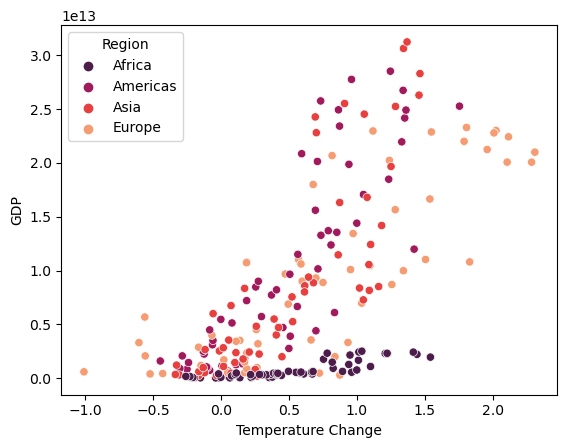

In [16]:
# Calculate the correlation coefficient (Pearson) between GDP and temperature change
correlation_coeff = merged_df['Temperature Change'].corr(merged_df['gdp'])
print("Correlation coefficient:", correlation_coeff)

# Create a scatter plot to visualize the relationship between GDP and temperature change
sns.scatterplot(x='Temperature Change', y='gdp', hue='Region', data=merged_df, palette = 'rocket')

# Set axis labels
plt.xlabel('Temperature Change')
plt.ylabel('GDP')

# Show the plot
plt.show()